In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import Isomap

In [3]:
# Load spike data
spike_data = np.load('../data/data_smooth_W20L50k.npy')                      
spike_data_t = spike_data[:,0:10000]
print(np.shape(spike_data))

# short time span
t = np.shape(spike_data_t)[1]
n = np.shape(spike_data)[0]


(336, 10000)


In [4]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
scaled=pd.DataFrame.to_numpy(scaled_data)

(336, 200)
(336, 200)
(336, 200)
(200,)


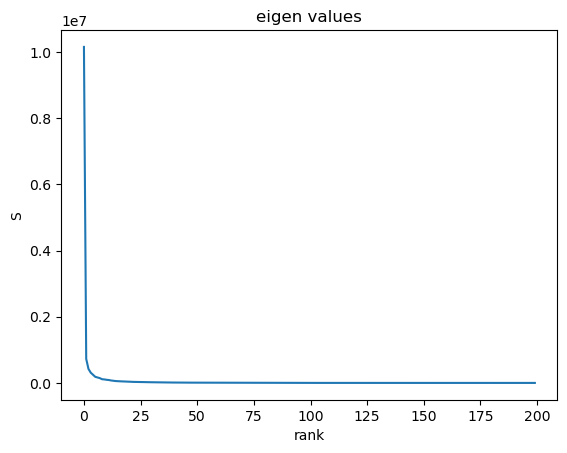

In [10]:
#Applying Isomap

#Taking no. of Principal Components r
r = 200
Iso = Isomap(n_components = r)



# X = USV'
iso = Iso.fit_transform(scaled_data) # = US


#print(iso)
print(iso.shape)

emb = Iso.embedding_
#print(emb)
print(emb.shape)

Kpca = Iso.kernel_pca_
#print(Kpca)
s = Kpca.eigenvectors_ # S
print(s.shape)
e = Kpca.eigenvalues_ # S
print(e.shape)
fig, ax = plt.subplots()
ax.plot(e)

ax.set(xlabel='rank', ylabel='S',
       title='eigen values')
plt.show()

In [11]:
print(iso)

[[  24.63599913  -53.84768729  -16.17399654 ...   -0.
     0.            0.        ]
 [  37.99735044 -105.7731256   -35.86220994 ...   -0.
     0.            0.        ]
 [  68.76312866  -97.57334057  -11.48144006 ...   -0.
     0.            0.        ]
 ...
 [ -96.59932785   24.7332539     8.15108497 ...   -0.
     0.            0.        ]
 [ -95.84727765   24.38778547    8.00588154 ...   -0.
     0.            0.        ]
 [ -95.84727765   24.38778547    8.00588154 ...    0.
    -0.            0.        ]]


In [12]:
#spike__projected = np.linalg.inv(E)@s.T@scaled_data
spike_projected = s.T@scaled_data
spike__projected = pd.DataFrame.to_numpy(spike_projected)

#print(spike_projected.T)

TypeError: Shapes of x (200, 1000) and z (200, 10000) do not match

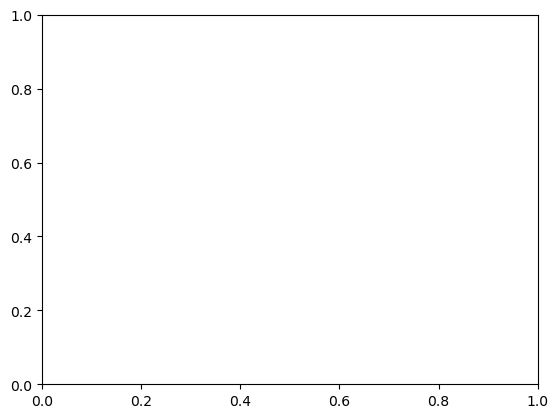

In [13]:
dims=r
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
#print(time.shape)
#print(time)
#print(neurons.shape)
#print(neurons)
T, N = np.meshgrid(time, neurons)


plt.contourf(T, N, spike__projected[0:dims,:], 10, cmap='RdGy')

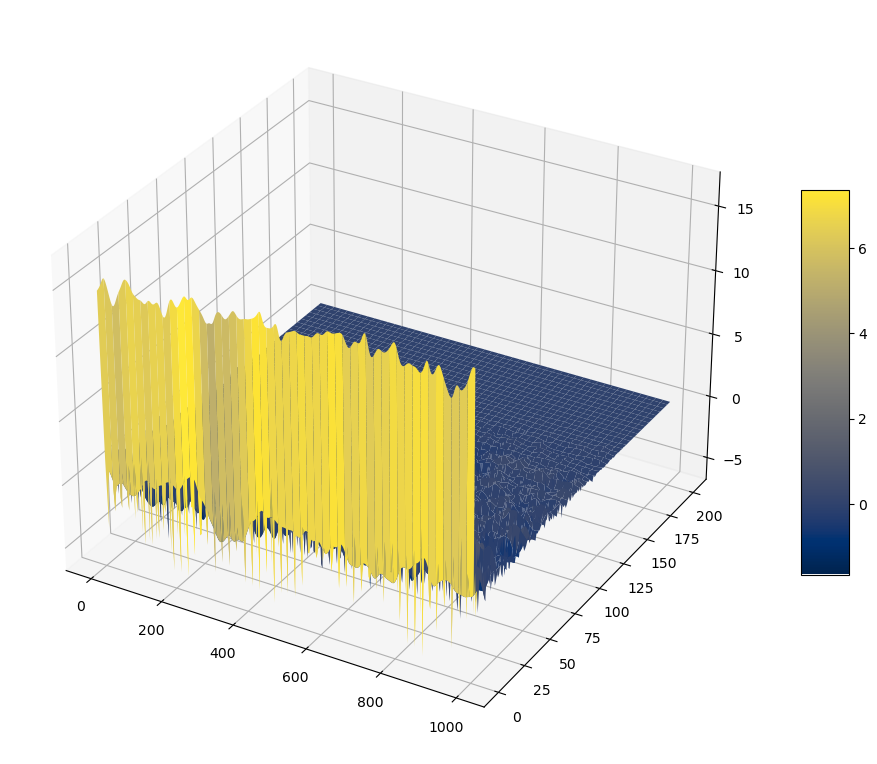

In [14]:
#%matplotlib qt
dims=r
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, spike__projected[0:dims,:1000], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [15]:
# reconstruct data
rank = 20
s_r = s[:,:rank]
spike__reconstructed = s@s.T@scaled_data
spike_reconstructed = pd.DataFrame.to_numpy(spike__reconstructed)
print(spike_reconstructed)
print(scaled)

[[-0.19309165 -0.20569327 -0.21579955 ...  0.90656343  0.9275955
   0.9478855 ]
 [-0.17007636 -0.17835212 -0.18759564 ...  0.19840165  0.12326492
   0.0530766 ]
 [ 1.01627379  1.03585686  1.05533442 ...  1.9626621   2.00248181
   2.0415308 ]
 ...
 [-0.43358839 -0.43790819 -0.44238463 ... -0.49760476 -0.4954953
  -0.49322576]
 [-0.45057443 -0.45283339 -0.45519974 ... -0.48555427 -0.48383082
  -0.48207637]
 [-0.45057443 -0.45283339 -0.45519974 ... -0.48555427 -0.48383082
  -0.48207637]]
[[-0.14495034 -0.17184927 -0.19773811 ...  1.68980921  1.71103351
   1.72933577]
 [-0.25903119 -0.25619775 -0.25448011 ...  0.27309587  0.18819466
   0.10972419]
 [ 1.20141377  1.26398498  1.32764595 ...  1.19624693  1.26913845
   1.34179988]
 ...
 [-0.45767411 -0.45931959 -0.46106096 ... -0.53416238 -0.53205685
  -0.52997983]
 [-0.45767411 -0.45931959 -0.46106096 ... -0.53416238 -0.53205685
  -0.52997983]
 [-0.45767411 -0.45931959 -0.46106096 ... -0.53416238 -0.53205685
  -0.52997983]]


In [17]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
%matplotlib qt
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Original data')
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
#surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
surf = ax.plot_surface(T, N, scaled[:,0:1000], cmap = plt.cm.cividis)

fig.colorbar(surf, shrink=0.5, aspect=8)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Reconstructed data')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(T, N, spike_reconstructed[:,0:1000], cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [18]:
spike_projected.shape

(200, 10000)

In [19]:
np.save('../data/smooth_spike_isomap_proj_10k', spike_projected)